<a href="https://colab.research.google.com/github/nikhil-xyz/ImageClassification/blob/main/Image_Classification_Cat_Vs_Dog_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This model will try to make the distinction between cat and dog images.

The dataset required will be downloaded from the kaggle during runtime.

Importing Dependencies

In [1]:
import matplotlib.pyplot as plt
import os
import numpy as np
import cv2
import tensorflow as tf
from tensorflow import keras

In [2]:
!git clone https://github.com/nikhil-xyz/ImageClassification.git

Cloning into 'ImageClassification'...
remote: Enumerating objects: 10271, done.
remote: Counting objects: 100% (258/258), done.
remote: Compressing objects: 100% (254/254), done.
remote: Total 10271 (delta 15), reused 226 (delta 2), pack-reused 10013
Receiving objects: 100% (10271/10271), 270.13 MiB | 25.38 MiB/s, done.
Resolving deltas: 100% (17/17), done.
Checking out files: 100% (10248/10248), done.


In [3]:
!mkdir -p ~/.kaggle
!cp ImageClassification/kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d tongpython/cat-and-dog

100% 217M/218M [00:06<00:00, 42.3MB/s]
100% 218M/218M [00:06<00:00, 37.7MB/s]


In [5]:
import zipfile 
zip_ref = zipfile.ZipFile('/content/cat-and-dog.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

Distributing the data into batched 

In [6]:
train = keras.utils.image_dataset_from_directory(
    directory = '/content/training_set/training_set',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256, 256)
)

Found 8005 files belonging to 2 classes.


In [7]:
type(train)

tensorflow.python.data.ops.dataset_ops.BatchDataset

In [8]:
validation = keras.utils.image_dataset_from_directory(
    directory = '/content/test_set/test_set',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256, 256)
)

Found 2023 files belonging to 2 classes.


Normalizing the data

In [9]:
def normalize(image, label):
  image = tf.cast(image/255., tf.float32)
  return image, label

train = train.map(normalize)
validation = validation.map(normalize)

Generating the CNN Model

In [14]:
from keras.layers.reshaping.flatten import Flatten
from keras.layers.serialization import activation
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), padding = 'same', activation='relu', input_shape=(256, 256, 3)),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(64, (3, 3), padding = 'same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(128, (3, 3), padding = 'same', activation='relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [16]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 128, 128, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 128, 128, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 64, 64, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 64, 64, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 32, 32, 128)     

Training the model

In [19]:
history = model.fit(train, validation_data=validation, epochs=10)

Epoch 1/10
251/251 [==============================] - 24s 93ms/step - loss: 0.6961 - accuracy: 0.5473 - val_loss: 0.6251 - val_accuracy: 0.6649
Epoch 2/10
251/251 [==============================] - 23s 92ms/step - loss: 0.5840 - accuracy: 0.6932 - val_loss: 0.5558 - val_accuracy: 0.7079
Epoch 3/10
251/251 [==============================] - 23s 90ms/step - loss: 0.4974 - accuracy: 0.7608 - val_loss: 0.5518 - val_accuracy: 0.7286
Epoch 4/10
251/251 [==============================] - 25s 97ms/step - loss: 0.3968 - accuracy: 0.8187 - val_loss: 0.7220 - val_accuracy: 0.7098
Epoch 5/10
251/251 [==============================] - 23s 91ms/step - loss: 0.3006 - accuracy: 0.8676 - val_loss: 0.7158 - val_accuracy: 0.7415
Epoch 6/10
251/251 [==============================] - 23s 91ms/step - loss: 0.2044 - accuracy: 0.9142 - val_loss: 0.7522 - val_accuracy: 0.7444
Epoch 7/10
251/251 [==============================] - 23s 90ms/step - loss: 0.1097 - accuracy: 0.9600 - val_loss: 1.0647 - val_accuracy:

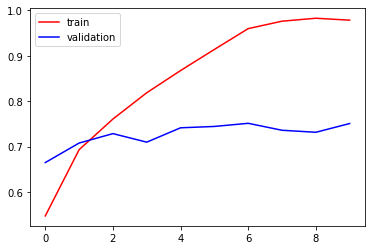

In [34]:
plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')
plt.legend()
plt.show()

In [41]:
classes = ['cat', 'dog']

1/1 [==============================] - 0s 35ms/step


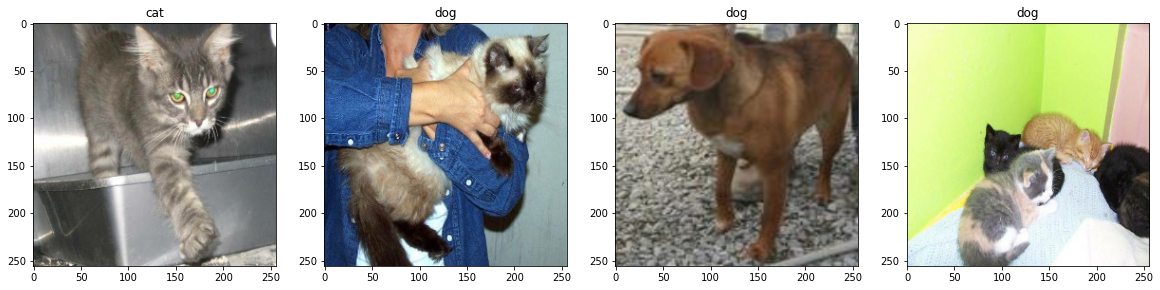

In [79]:
iter = validation.as_numpy_iterator()
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for index in range(4):
  batch = iter.next()
  ax[index].imshow(np.squeeze(batch[0][index]))
  image = batch[0][index]
  image = tf.image.resize(image, (256, 256))
  image = np.expand_dims(image, axis = 0)
  pred = int(model.predict(image) > 0.5)
  ax[index].title.set_text(classes[pred])

In [80]:
batch = iter.next()
images, labels = batch[0], batch[1]

In [85]:
y_pred = (model.predict(images) > 0.5).astype(int)

1/1 [==============================] - 0s 46ms/step


In [88]:
print(type(labels))

<class 'numpy.ndarray'>


In [94]:
c_matrix = tf.math.confusion_matrix(labels=labels, predictions = y_pred, num_classes=2)

Text(87.0, 0.5, 'True')

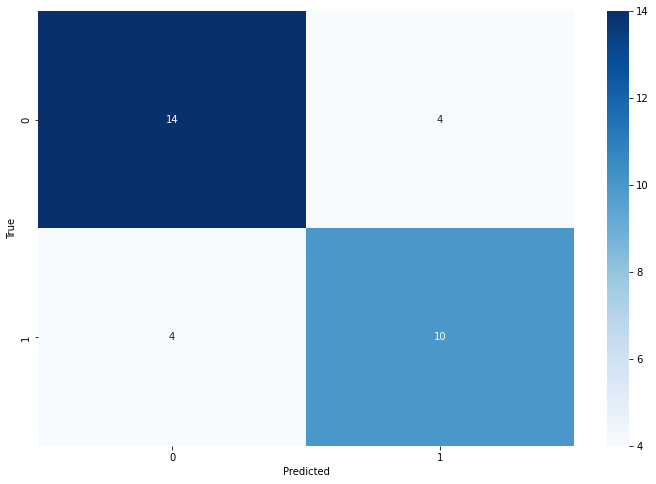

In [96]:
import seaborn as sns
plt.figure(figsize = (12, 8))
sns.heatmap(c_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')